# Prepare datasets for publishing

In [1]:
%matplotlib inline

import sys
import warnings
import odc.geo.xr
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from odc.geo.xr import assign_crs

## Open datasets


In [2]:
p_average = assign_crs(xr.open_dataset(f'/g/data/os22/chad_tmp/Aus_phenology/results/mean_phenology_perpixel_circular.nc'), crs='EPSG:4326')
p_trends = assign_crs(xr.open_dataset(f'/g/data/os22/chad_tmp/Aus_phenology/results/trends_phenology_perpixel_circular.nc'), crs='EPSG:4326')

## Masking

In [3]:
season_per_year = p_average['n_seasons']/p_average['n_years']
non_seasonal = xr.where((season_per_year <= 0.90),1,0)
extra_seasonal = xr.where((season_per_year >= 1.1),1,0)
seasonality_mask = (non_seasonal | extra_seasonal)

sos_nan = np.isnan(p_trends['SOS_slope']).where(~np.isnan(p_average['SOS']))
sos_nan = xr.where((sos_nan==1) & (seasonality_mask==0), 1, 0)

eos_nan = np.isnan(p_trends['EOS_slope']).where(~np.isnan(p_average['EOS']))
eos_nan = xr.where((eos_nan==1) & (seasonality_mask==0), 1, 0)

pos_nan = np.isnan(p_trends['POS_slope']).where(~np.isnan(p_average['POS']))
pos_nan = xr.where((pos_nan==1) & (seasonality_mask==0), 1, 0)

extra_mask = (seasonality_mask | sos_nan | eos_nan | pos_nan)

In [4]:
p_average = p_average.where(seasonality_mask!=1)
p_trends = p_trends.where(extra_mask!=1)

## Plot

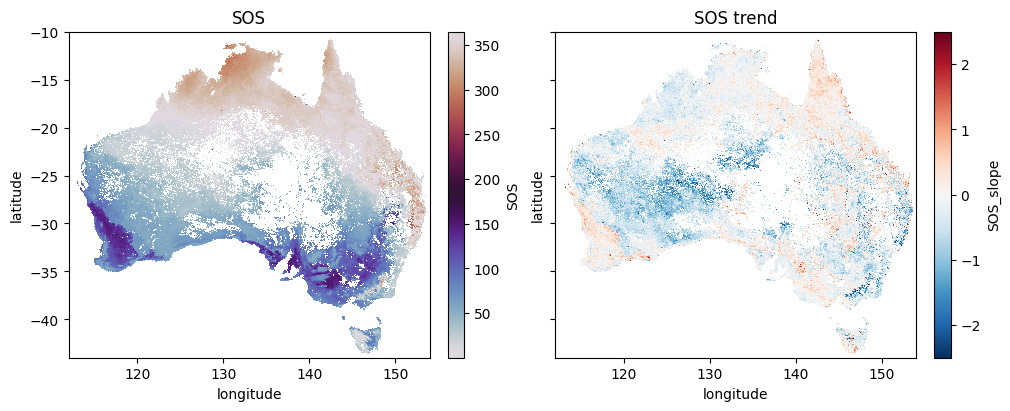

In [5]:
fig,ax = plt.subplots(1,2, figsize=(10,4),sharey=True, layout='constrained')
p_average['SOS'].plot(ax=ax[0], cmap='twilight')
p_trends['SOS_slope'].plot(ax=ax[1], cmap='RdBu_r');
ax[0].set_title('SOS')
ax[1].set_title('SOS trend');

## Add metadata

In [6]:
attrs_dict_average={}
attrs_dict_average['nodata'] = np.nan
attrs_dict_average['crs'] = 'EPSG:4326'
attrs_dict_average['version'] = 'v1.0'
attrs_dict_average['description'] = 'Long-term (1982-2022) average land surface phenology for Australia. Variables SOS, POS, EOS, TOS are calculated using the circular mean approach, while the SOS_std, POS_std, EOS_std, TOS_std refer to the circular standard deviation of the same variables. All other variables are calculated using a median statistic. Refer to the accompanying publication for acronym descriptions.'
attrs_dict_average['citation'] = 'TBC'
attrs_dict_average['email'] = 'chad.burton@anu.edu.au'
p_average.attrs = attrs_dict_average
p_average

<xarray.Dataset> Size: 57MB
Dimensions:      (latitude: 680, longitude: 840)
Coordinates:
  * latitude     (latitude) float64 5kB -43.97 -43.92 -43.88 ... -10.07 -10.02
  * longitude    (longitude) float64 7kB 112.0 112.1 112.1 ... 153.9 153.9 154.0
    spatial_ref  int32 4B 4326
Data variables: (12/25)
    POS_year     (latitude, longitude) float32 2MB nan nan nan ... nan nan nan
    POS          (latitude, longitude) float32 2MB nan nan nan ... nan nan nan
    vPOS         (latitude, longitude) float32 2MB nan nan nan ... nan nan nan
    TOS_year     (latitude, longitude) float32 2MB nan nan nan ... nan nan nan
    TOS          (latitude, longitude) float32 2MB nan nan nan ... nan nan nan
    vTOS         (latitude, longitude) float32 2MB nan nan nan ... nan nan nan
    ...           ...
    SOS_std      (latitude, longitude) float32 2MB nan nan nan ... nan nan nan
    POS_std      (latitude, longitude) float32 2MB nan nan nan ... nan nan nan
    EOS_std      (latitude, longitude) float32 2MB nan nan nan ... nan nan nan
    TOS_std      (latitude, longitude) float32 2MB nan nan nan ... nan nan nan
    n_seasons    (latitude, longitude) float32 2MB nan nan nan ... nan nan nan
    n_years      (latitude, longitude) float32 2MB nan nan nan ... nan nan nan
Attributes:
    nodata:       nan
    crs:          EPSG:4326
    version:      v1.0
    description:  Long-term (1982-2022) average land surface phenology for Au...
    citation:     TBC
    email:        chad.burton@anu.edu.au

In [7]:
attrs_dict_trend={}
attrs_dict_trend['nodata'] = np.nan
attrs_dict_trend['crs'] = 'EPSG:4326'
attrs_dict_trend['version'] = 'v1.0'
attrs_dict_trend['description'] = 'Long-term (1982-2022) land surface phenology trends for Australia. Refer to the accompanying publication for acronym  descriptions and for a description of how trends are calculated.'
attrs_dict_trend['citation'] = 'TBC'
attrs_dict_trend['email'] = 'chad.burton@anu.edu.au'
p_trends.attrs = attrs_dict_trend
p_trends

<xarray.Dataset> Size: 69MB
Dimensions:       (latitude: 680, longitude: 840)
Coordinates:
  * latitude      (latitude) float64 5kB -43.97 -43.92 -43.88 ... -10.07 -10.02
  * longitude     (longitude) float64 7kB 112.0 112.1 112.1 ... 153.9 154.0
    spatial_ref   int32 4B 4326
Data variables: (12/30)
    POS_slope     (latitude, longitude) float32 2MB nan nan nan ... nan nan nan
    vPOS_slope    (latitude, longitude) float32 2MB nan nan nan ... nan nan nan
    TOS_slope     (latitude, longitude) float32 2MB nan nan nan ... nan nan nan
    vTOS_slope    (latitude, longitude) float32 2MB nan nan nan ... nan nan nan
    AOS_slope     (latitude, longitude) float32 2MB nan nan nan ... nan nan nan
    SOS_slope     (latitude, longitude) float32 2MB nan nan nan ... nan nan nan
    ...            ...
    LOS_p_value   (latitude, longitude) float32 2MB nan nan nan ... nan nan nan
    LOC_p_value   (latitude, longitude) float32 2MB nan nan nan ... nan nan nan
    IOS_p_value   (latitude, longitude) float32 2MB nan nan nan ... nan nan nan
    IOC_p_value   (latitude, longitude) float32 2MB nan nan nan ... nan nan nan
    ROG_p_value   (latitude, longitude) float32 2MB nan nan nan ... nan nan nan
    ROS_p_value   (latitude, longitude) float32 2MB nan nan nan ... nan nan nan
Attributes:
    nodata:       nan
    crs:          EPSG:4326
    version:      v1.0
    description:  Long-term (1982-2022) land surface phenology trends for Aus...
    citation:     TBC
    email:        chad.burton@anu.edu.au

## Export

In [8]:
p_average.to_netcdf('/g/data/os22/chad_tmp/Aus_phenology/results/publication_datasets/Australian_LSP_average_1982_2022_v1.0.nc')
p_trends.to_netcdf('/g/data/os22/chad_tmp/Aus_phenology/results/publication_datasets/Australian_LSP_trends_1982_2022_v1.0.nc')

/g/data/os22/chad_tmp/AusENDVI/env/py310/lib/python3.10/site-packages/dask/config.py:779: FutureWarning: Dask configuration key 'ucx' has been deprecated; please use 'distributed.comm.ucx' instead
  warnings.warn(
/g/data/os22/chad_tmp/AusENDVI/env/py310/lib/python3.10/site-packages/dask/config.py:779: FutureWarning: Dask configuration key 'distributed.scheduler.transition-log-length' has been deprecated; please use 'distributed.admin.low-level-log-length' instead
  warnings.warn(
/g/data/os22/chad_tmp/AusENDVI/env/py310/lib/python3.10/site-packages/dask/config.py:779: FutureWarning: Dask configuration key 'distributed.comm.recent-messages-log-length' has been deprecated; please use 'distributed.admin.low-level-log-length' instead
  warnings.warn(
